<a href="https://colab.research.google.com/github/thesimaranjaira/AspectExtraction_SentimentAnalysis/blob/main/corrected_windelta_actual_summer_scatter_NO4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install energyquantified

     |████████████████████████████████| 76 kB 1.8 MB/s 
     |████████████████████████████████| 227 kB 10.0 MB/s 
     |████████████████████████████████| 61 kB 4.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: python-dateutil
    Found existing installation: python-dateutil 2.8.2
    Uninstalling python-dateutil-2.8.2:
      Successfully uninstalled python-dateutil-2.8.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.25.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [2]:
import pandas as pd
from datetime import timedelta, date
from energyquantified import EnergyQuantified
from energyquantified.time import Frequency
from energyquantified.metadata import Aggregation
from datetime import datetime as dtdatetime
from energyquantified.time import (
   Resolution, Frequency, UTC, get_datetime
)
import matplotlib as mplt
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [5]:
api_key = 'ea1244-4926fe-571bed-d0f4b5'
EQ = EnergyQuantified(api_key=api_key)

In [6]:
def get_data_from_instance(identifier, issued, frequency):
    forecast = EQ.instances.get(
        identifier,
        issued=issued,
        tag='arome',                        # select forecast
        frequency=frequency,
        aggregation=Aggregation.AVERAGE,
        # ensembles=True                    # Include ensembles
    )
    df = forecast.to_dataframe()
   
    return df

In [7]:
from datetime import datetime, time

In [8]:
day_ahead_zero = EQ.timeseries.load(
   'NO4 Wind Power Production MWh/h H Actual',
   begin='2020-06-01',
   end='2020-08-31',
   frequency=Frequency.PT1H
)
day_ahead_zero = day_ahead_zero.to_dataframe()

In [9]:
day_ahead_zero

,NO4 Wind Power Production MWh/h H Actual
,
,
date,
2020-06-01 00:00:00+02:00,171.0
2020-06-01 01:00:00+02:00,163.0
2020-06-01 02:00:00+02:00,155.0
2020-06-01 03:00:00+02:00,141.0
2020-06-01 04:00:00+02:00,152.0
...,...
2020-08-30 19:00:00+02:00,64.0


In [10]:
day_ahead_forecast_twelve = EQ.instances.relative(
   'NO4 Wind Power Production MWh/h 15min Forecast',
   begin=dtdatetime(2020, 6, 1, 0, 0, 0),
   end=dtdatetime(2020, 8, 31, 0, 0, 0),
   tag='arome',
   days_ahead = 1,  # The day-ahead forecast (0 or higher allowed)
   time_of_day = time(12, 0),  # Issued at exactly 12:00
  #  issued ='earliest',
   frequency = Frequency.PT1H
)
day_ahead_twelve=day_ahead_forecast_twelve.to_dataframe()

In [11]:
day_ahead_twelve

,NO4 Wind Power Production MWh/h 15min Forecast
,
,
date,
2020-06-01 00:00:00+02:00,198.30
2020-06-01 01:00:00+02:00,197.90
2020-06-01 02:00:00+02:00,203.55
2020-06-01 03:00:00+02:00,204.43
2020-06-01 04:00:00+02:00,203.25
...,...
2020-08-30 19:00:00+02:00,101.33


In [12]:
df_comb = pd.merge(day_ahead_zero, day_ahead_twelve, left_index=True, right_index=True, how='inner')
df_comb

,NO4 Wind Power Production MWh/h H Actual,NO4 Wind Power Production MWh/h 15min Forecast
,,
,,
date,,
2020-06-01 00:00:00+02:00,171.0,198.30
2020-06-01 01:00:00+02:00,163.0,197.90
2020-06-01 02:00:00+02:00,155.0,203.55
2020-06-01 03:00:00+02:00,141.0,204.43
2020-06-01 04:00:00+02:00,152.0,203.25
...,...,...
2020-08-30 19:00:00+02:00,64.0,101.33


In [13]:
df_comb.columns

MultiIndex([(      'NO4 Wind Power Production MWh/h H Actual', '', ''),
            ('NO4 Wind Power Production MWh/h 15min Forecast', '', '')],
           )

In [14]:
df_comb['Wind Delta', '', '']= df_comb['NO4 Wind Power Production MWh/h H Actual',''] - df_comb['NO4 Wind Power Production MWh/h 15min Forecast','']

/usr/local/lib/python3.7/dist-packages/ipykernel/kernelbase.py:399: PerformanceWarning: indexing past lexsort depth may impact performance.
  user_expressions, allow_stdin)


In [15]:
df_comb

,NO4 Wind Power Production MWh/h H Actual,NO4 Wind Power Production MWh/h 15min Forecast,Wind Delta
,,,
,,,
date,,,
2020-06-01 00:00:00+02:00,171.0,198.30,-27.30
2020-06-01 01:00:00+02:00,163.0,197.90,-34.90
2020-06-01 02:00:00+02:00,155.0,203.55,-48.55
2020-06-01 03:00:00+02:00,141.0,204.43,-63.43
2020-06-01 04:00:00+02:00,152.0,203.25,-51.25
...,...,...,...
2020-08-30 19:00:00+02:00,64.0,101.33,-37.33


In [16]:
df_comb.columns

MultiIndex([(      'NO4 Wind Power Production MWh/h H Actual', '', ''),
            ('NO4 Wind Power Production MWh/h 15min Forecast', '', ''),
            (                                    'Wind Delta', '', '')],
           )

In [17]:
df_comb.drop(['NO4 Wind Power Production MWh/h H Actual', 'NO4 Wind Power Production MWh/h 15min Forecast'], axis=1, level=0 ,inplace=True)
df_comb

,Wind Delta
,
,
date,
2020-06-01 00:00:00+02:00,-27.30
2020-06-01 01:00:00+02:00,-34.90
2020-06-01 02:00:00+02:00,-48.55
2020-06-01 03:00:00+02:00,-63.43
2020-06-01 04:00:00+02:00,-51.25
...,...
2020-08-30 19:00:00+02:00,-37.33


In [18]:
df_comb.columns = ['_'.join(col) for col in df_comb.columns.values]

In [19]:
df_comb

,Wind Delta__
date,
2020-06-01 00:00:00+02:00,-27.30
2020-06-01 01:00:00+02:00,-34.90
2020-06-01 02:00:00+02:00,-48.55
2020-06-01 03:00:00+02:00,-63.43
2020-06-01 04:00:00+02:00,-51.25
...,...
2020-08-30 19:00:00+02:00,-37.33
2020-08-30 20:00:00+02:00,-28.58
2020-08-30 21:00:00+02:00,-35.18


In [20]:
df_comb.columns

Index(['Wind Delta__'], dtype='object')

In [21]:
spot=(pd.read_csv('/content/drive/My Drive/dataset/market_prices_euro_updated.csv', index_col = ["time"], parse_dates=True).loc[:,"NO4_spot"])
imbalance = (pd.read_csv('/content/drive/My Drive/dataset/market_prices_euro_updated.csv', index_col = ["time"], parse_dates=True).loc[:,"NO4_imbalance"])

In [22]:
spot=spot.to_frame()
imbalance= imbalance.to_frame()

In [23]:
spot

,NO4_spot
time,
2018-02-01 00:00:00,0.02552
2018-02-01 01:00:00,0.02558
2018-02-01 02:00:00,0.02553
2018-02-01 03:00:00,0.02573
2018-02-01 04:00:00,0.02684
...,...
2021-04-22 08:00:00,0.02250
2021-04-22 09:00:00,0.02240
2021-04-22 10:00:00,0.02204


In [24]:
imbalance

,NO4_imbalance
time,
2018-02-01 00:00:00,0.00300
2018-02-01 01:00:00,0.00300
2018-02-01 02:00:00,0.00300
2018-02-01 03:00:00,0.02573
2018-02-01 04:00:00,0.02334
...,...
2021-04-22 08:00:00,0.02250
2021-04-22 09:00:00,0.02240
2021-04-22 10:00:00,0.03157


In [25]:
imbalance.tz_localize(None)

,NO4_imbalance
time,
2018-02-01 00:00:00,0.00300
2018-02-01 01:00:00,0.00300
2018-02-01 02:00:00,0.00300
2018-02-01 03:00:00,0.02573
2018-02-01 04:00:00,0.02334
...,...
2021-04-22 08:00:00,0.02250
2021-04-22 09:00:00,0.02240
2021-04-22 10:00:00,0.03157


In [26]:
imbalance.index = pd.to_datetime(imbalance.index, utc=True).tz_convert('Europe/Stockholm')

In [27]:
imbalance

,NO4_imbalance
time,
2018-02-01 01:00:00+01:00,0.00300
2018-02-01 02:00:00+01:00,0.00300
2018-02-01 03:00:00+01:00,0.00300
2018-02-01 04:00:00+01:00,0.02573
2018-02-01 05:00:00+01:00,0.02334
...,...
2021-04-22 10:00:00+02:00,0.02250
2021-04-22 11:00:00+02:00,0.02240
2021-04-22 12:00:00+02:00,0.03157


In [28]:
spot.tz_localize(None)

,NO4_spot
time,
2018-02-01 00:00:00,0.02552
2018-02-01 01:00:00,0.02558
2018-02-01 02:00:00,0.02553
2018-02-01 03:00:00,0.02573
2018-02-01 04:00:00,0.02684
...,...
2021-04-22 08:00:00,0.02250
2021-04-22 09:00:00,0.02240
2021-04-22 10:00:00,0.02204


In [29]:
spot.index = pd.to_datetime(spot.index, utc=True).tz_convert('Europe/Stockholm')

In [30]:
spot

,NO4_spot
time,
2018-02-01 01:00:00+01:00,0.02552
2018-02-01 02:00:00+01:00,0.02558
2018-02-01 03:00:00+01:00,0.02553
2018-02-01 04:00:00+01:00,0.02573
2018-02-01 05:00:00+01:00,0.02684
...,...
2021-04-22 10:00:00+02:00,0.02250
2021-04-22 11:00:00+02:00,0.02240
2021-04-22 12:00:00+02:00,0.02204


In [31]:
df_comb.tz_convert(None)

,Wind Delta__
date,
2020-05-31 22:00:00,-27.30
2020-05-31 23:00:00,-34.90
2020-06-01 00:00:00,-48.55
2020-06-01 01:00:00,-63.43
2020-06-01 02:00:00,-51.25
...,...
2020-08-30 17:00:00,-37.33
2020-08-30 18:00:00,-28.58
2020-08-30 19:00:00,-35.18


In [32]:
df_comb.index = pd.to_datetime(df_comb.index, utc=True).tz_convert('Europe/Stockholm')

In [33]:
df_comb

,Wind Delta__
date,
2020-06-01 00:00:00+02:00,-27.30
2020-06-01 01:00:00+02:00,-34.90
2020-06-01 02:00:00+02:00,-48.55
2020-06-01 03:00:00+02:00,-63.43
2020-06-01 04:00:00+02:00,-51.25
...,...
2020-08-30 19:00:00+02:00,-37.33
2020-08-30 20:00:00+02:00,-28.58
2020-08-30 21:00:00+02:00,-35.18


In [34]:
df_plot = pd.merge(df_comb, spot , left_index=True, right_index=True, how='inner')
df_plot

,Wind Delta__,NO4_spot
2020-06-01 00:00:00+02:00,-27.30,0.00454
2020-06-01 01:00:00+02:00,-34.90,0.00416
2020-06-01 02:00:00+02:00,-48.55,0.02650
2020-06-01 03:00:00+02:00,-63.43,0.02701
2020-06-01 04:00:00+02:00,-51.25,0.02706
...,...,...
2020-08-30 19:00:00+02:00,-37.33,0.01114
2020-08-30 20:00:00+02:00,-28.58,0.01121
2020-08-30 21:00:00+02:00,-35.18,0.01123
2020-08-30 22:00:00+02:00,-46.90,0.01109


In [35]:
df_plot = pd.merge(df_plot, imbalance, left_index=True, right_index=True, how='inner')
df_plot

,Wind Delta__,NO4_spot,NO4_imbalance
2020-06-01 00:00:00+02:00,-27.30,0.00454,0.01200
2020-06-01 01:00:00+02:00,-34.90,0.00416,0.00667
2020-06-01 02:00:00+02:00,-48.55,0.02650,0.02650
2020-06-01 03:00:00+02:00,-63.43,0.02701,0.02500
2020-06-01 04:00:00+02:00,-51.25,0.02706,0.02400
...,...,...,...
2020-08-30 19:00:00+02:00,-37.33,0.01114,0.01114
2020-08-30 20:00:00+02:00,-28.58,0.01121,0.01480
2020-08-30 21:00:00+02:00,-35.18,0.01123,0.01480
2020-08-30 22:00:00+02:00,-46.90,0.01109,0.01433


In [36]:
df_plot.columns

Index(['Wind Delta__', 'NO4_spot', 'NO4_imbalance'], dtype='object')

In [37]:
df_plot['Direction']= df_plot['NO4_spot']-df_plot['NO4_imbalance']

In [38]:
df_plot

,Wind Delta__,NO4_spot,NO4_imbalance,Direction
2020-06-01 00:00:00+02:00,-27.30,0.00454,0.01200,-0.00746
2020-06-01 01:00:00+02:00,-34.90,0.00416,0.00667,-0.00251
2020-06-01 02:00:00+02:00,-48.55,0.02650,0.02650,0.00000
2020-06-01 03:00:00+02:00,-63.43,0.02701,0.02500,0.00201
2020-06-01 04:00:00+02:00,-51.25,0.02706,0.02400,0.00306
...,...,...,...,...
2020-08-30 19:00:00+02:00,-37.33,0.01114,0.01114,0.00000
2020-08-30 20:00:00+02:00,-28.58,0.01121,0.01480,-0.00359
2020-08-30 21:00:00+02:00,-35.18,0.01123,0.01480,-0.00357
2020-08-30 22:00:00+02:00,-46.90,0.01109,0.01433,-0.00324


In [39]:
df_plot.drop(['NO4_spot', 'NO4_imbalance'], axis=1, inplace=True)

In [40]:
df_plot.index.name="Date"

In [41]:
df_plot

,Wind Delta__,Direction
Date,,
2020-06-01 00:00:00+02:00,-27.30,-0.00746
2020-06-01 01:00:00+02:00,-34.90,-0.00251
2020-06-01 02:00:00+02:00,-48.55,0.00000
2020-06-01 03:00:00+02:00,-63.43,0.00201
2020-06-01 04:00:00+02:00,-51.25,0.00306
...,...,...
2020-08-30 19:00:00+02:00,-37.33,0.00000
2020-08-30 20:00:00+02:00,-28.58,-0.00359
2020-08-30 21:00:00+02:00,-35.18,-0.00357


In [42]:
df_plot.columns

Index(['Wind Delta__', 'Direction'], dtype='object')

In [43]:
df_plot['Direction'] = df_plot['Direction'].apply(lambda x: x*1000)

In [44]:
df_plot

,Wind Delta__,Direction
Date,,
2020-06-01 00:00:00+02:00,-27.30,-7.46
2020-06-01 01:00:00+02:00,-34.90,-2.51
2020-06-01 02:00:00+02:00,-48.55,0.00
2020-06-01 03:00:00+02:00,-63.43,2.01
2020-06-01 04:00:00+02:00,-51.25,3.06
...,...,...
2020-08-30 19:00:00+02:00,-37.33,0.00
2020-08-30 20:00:00+02:00,-28.58,-3.59
2020-08-30 21:00:00+02:00,-35.18,-3.57


In [45]:
df_plot.columns

Index(['Wind Delta__', 'Direction'], dtype='object')

In [46]:
df_plot['Wind Delta__'].astype('float64')

Date
2020-06-01 00:00:00+02:00   -27.30
2020-06-01 01:00:00+02:00   -34.90
2020-06-01 02:00:00+02:00   -48.55
2020-06-01 03:00:00+02:00   -63.43
2020-06-01 04:00:00+02:00   -51.25
                             ...  
2020-08-30 19:00:00+02:00   -37.33
2020-08-30 20:00:00+02:00   -28.58
2020-08-30 21:00:00+02:00   -35.18
2020-08-30 22:00:00+02:00   -46.90
2020-08-30 23:00:00+02:00   -28.98
Name: Wind Delta__, Length: 2078, dtype: float64

In [47]:
df_plot['Direction'].astype('float64')

Date
2020-06-01 00:00:00+02:00   -7.46
2020-06-01 01:00:00+02:00   -2.51
2020-06-01 02:00:00+02:00    0.00
2020-06-01 03:00:00+02:00    2.01
2020-06-01 04:00:00+02:00    3.06
                             ... 
2020-08-30 19:00:00+02:00    0.00
2020-08-30 20:00:00+02:00   -3.59
2020-08-30 21:00:00+02:00   -3.57
2020-08-30 22:00:00+02:00   -3.24
2020-08-30 23:00:00+02:00    0.00
Name: Direction, Length: 2078, dtype: float64

In [48]:
blue = sns.color_palette("muted", desat=0.9)[0]
green = sns.color_palette("muted", desat=0.9)[2]
red = sns.color_palette("muted", desat=0.9)[3]
grey = sns.color_palette("muted", desat=0.9)[7]

In [49]:
# fig, ax1 = plt.subplots(figsize=[20,7])

# x = df_plot.index
# plt.xlabel("Timestamp")
# plt.ylabel("Wind Delta", fontsize=12, color=red);
# y1 = df_plot['Wind Delta__']
# y2 = df_plot['Direction']

# ax2 = ax1.twinx()

# ax1.scatter(x, y1, alpha=0.6, lw=4, color=red)
# plt.ylabel("Direction of Market", fontsize=12, color=blue);
# ax2.scatter(x, y2, alpha=0.6, lw=4, color=blue)
# ax1.invert_yaxis()
# ax2.invert_yaxis()
# plt.autoscale();

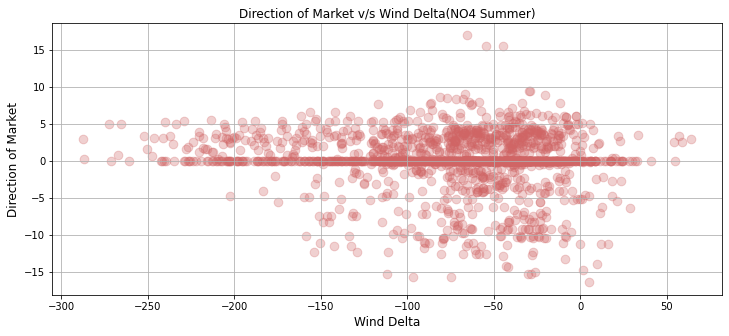

In [50]:
fig= plt.figure(figsize=[12,5])
plt.scatter(x=df_plot['Wind Delta__'],
            y=df_plot['Direction'],
            alpha=0.3,
            s=75,
            color=red);
plt.grid()
plt.xlabel("Wind Delta", fontsize=12),
plt.ylabel("Direction of Market", fontsize=12);
plt.title("Direction of Market v/s Wind Delta(NO4 Summer)");
plt.autoscale();

In [51]:
df_plot['Wind Delta__'].quantile(0.9)

-15.079999999999986